In [51]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
pip install lxml


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# 1.Extracting Tesla Stock Data Using yfinance 


In [87]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[*********************100%%**********************]  1 of 1 completed


 Tesla Stock Data (First 5 Rows):
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000  142981500
2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000  266677500
2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667  151995000
2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666  268231500
2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334  467164500


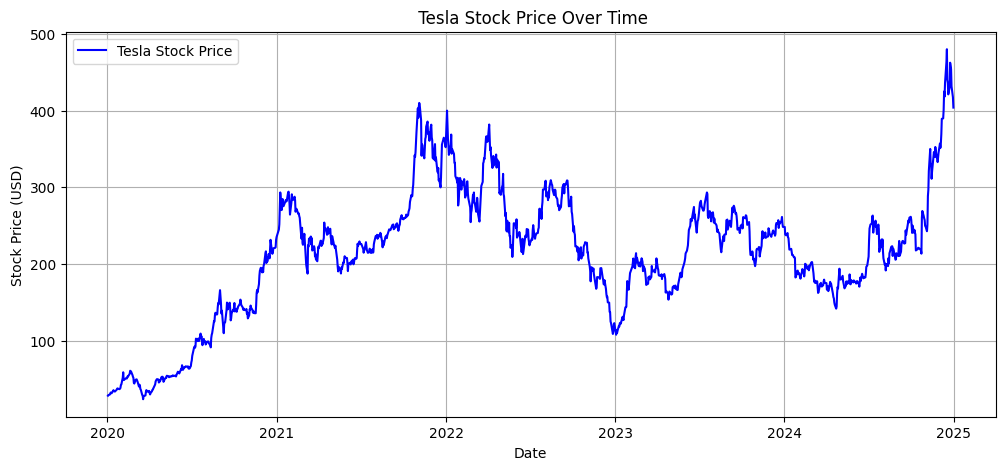

In [89]:
# Define stock symbol for Tesla
symbol = "TSLA"

# Download Tesla stock data from Yahoo Finance
stock_data = yf.download(symbol, start="2020-01-01", end="2025-01-01")

# Display the first 5 rows of data
print(" Tesla Stock Data (First 5 Rows):")
print(stock_data.head())

# Plot Tesla Stock Price Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=stock_data.index, y=stock_data['Close'], label="Tesla Stock Price", color='blue')
plt.title(" Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# 2. Use Webscraping to Extract Tesla Revenue Data

In [60]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [61]:
# URL of Tesla revenue data (Macrotrends as an example)
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [62]:
# Get the webpage content
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing revenue data
tables = soup.find_all('table')
for table in tables:
    if 'Revenue' in str(table):
        revenue_table = table
        break

# Extract data from the table
rows = revenue_table.find_all('tr')
data = []
for row in rows[1:]:  # Skip header row
    cols = row.find_all('td')
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Save to CSV
df.to_csv('tesla_revenue.csv', index=False)

# Display the DataFrame
df.head()


,Date,Revenue
0,2024,"$97,690"
1,2023,"$96,773"
2,2022,"$81,462"
3,2021,"$53,823"
4,2020,"$31,536"


In [63]:
import yfinance as yf
import pandas as pd


# Extracting GameStop Stock Data Using yfinance

In [64]:
# Define the stock symbol for GameStop
symbol = "GME"

# Download historical stock data
stock_data = yf.download(symbol, start="2020-01-01", end="2025-01-01")

# Save to CSV
stock_data.to_csv("gamestop_stock_data.csv")

# Display the first few rows
stock_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1.5350,1.6175,1.5175,1.5775,1.5775,17814400
2020-01-03,1.5525,1.5625,1.4600,1.4700,1.4700,14175600
2020-01-06,1.4500,1.4775,1.4000,1.4625,1.4625,13579200
2020-01-07,1.4425,1.4575,1.3600,1.3800,1.3800,20912000
2020-01-08,1.3725,1.4625,1.3525,1.4300,1.4300,22517600


In [65]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Extracting GameStop Revenue Data Using Webscraping

In [66]:
# URL of GameStop revenue data (Macrotrends as an example)
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Get the webpage content
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing revenue data
tables = soup.find_all('table')
for table in tables:
    if 'Revenue' in str(table):
        revenue_table = table
        break

# Extract data from the table
rows = revenue_table.find_all('tr')
data = []
for row in rows[1:]:  # Skip header row
    cols = row.find_all('td')
    if len(cols) > 1:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Date', 'Revenue'])

# Save to CSV
df.to_csv('gamestop_revenue.csv', index=False)

# Display the DataFrame
df.head()


,Date,Revenue
0,2024,"$5,273"
1,2023,"$5,927"
2,2022,"$6,011"
3,2021,"$5,090"
4,2020,"$6,466"


In [67]:

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Tesla Stock and Revenue Dashboard 

[*********************100%%**********************]  1 of 1 completed


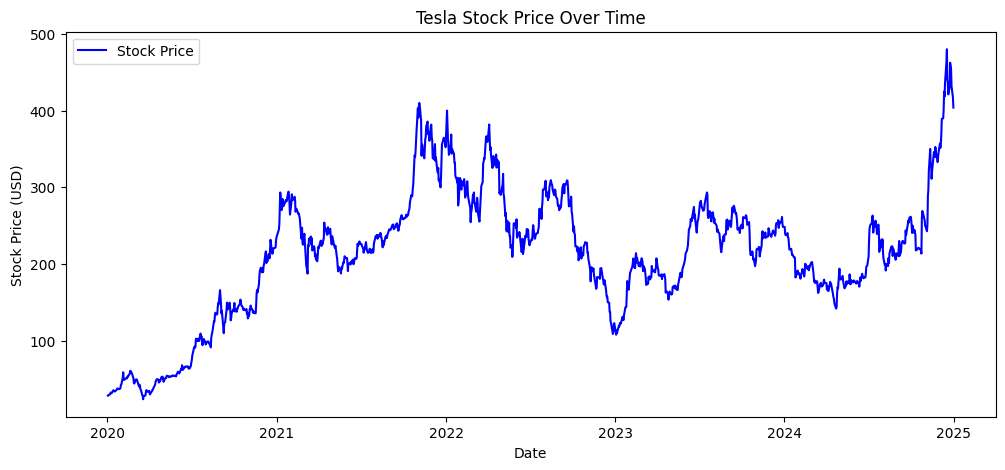

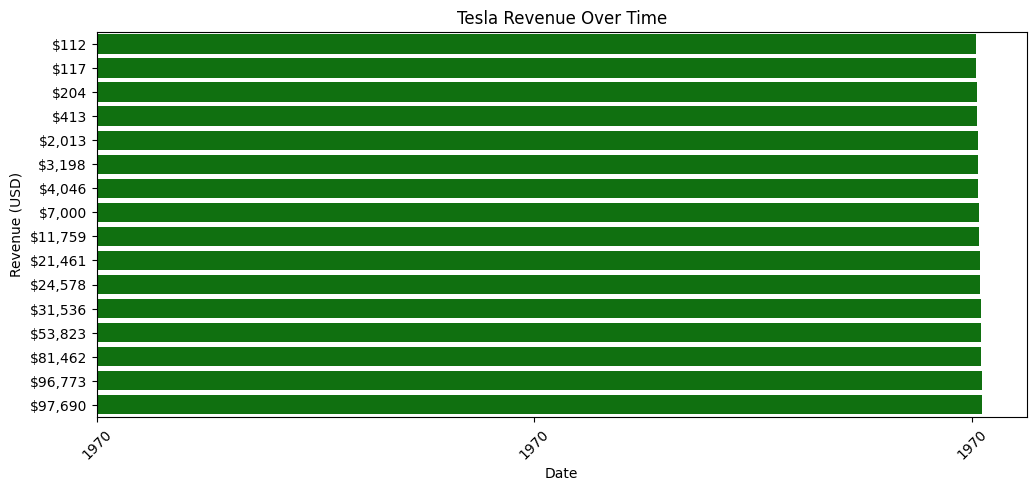

In [85]:
# Download Tesla stock data
symbol = "TSLA"
stock_data = yf.download(symbol, start="2020-01-01", end="2025-01-01")

# Load Tesla revenue data
revenue_data = pd.read_csv("tesla_revenue.csv")
revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
revenue_data = revenue_data.sort_values('Date')

# Plot Tesla Stock Price
plt.figure(figsize=(12, 5))
sns.lineplot(x=stock_data.index, y=stock_data['Close'], label="Stock Price", color='blue')
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

# Plot Tesla Revenue Data
plt.figure(figsize=(12, 5))
sns.barplot(x=revenue_data['Date'], y=revenue_data['Revenue'], color='green')
plt.title("Tesla Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

# GameStop Stock and Revenue Dashboard

In [74]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




[*********************100%%**********************]  1 of 1 completed


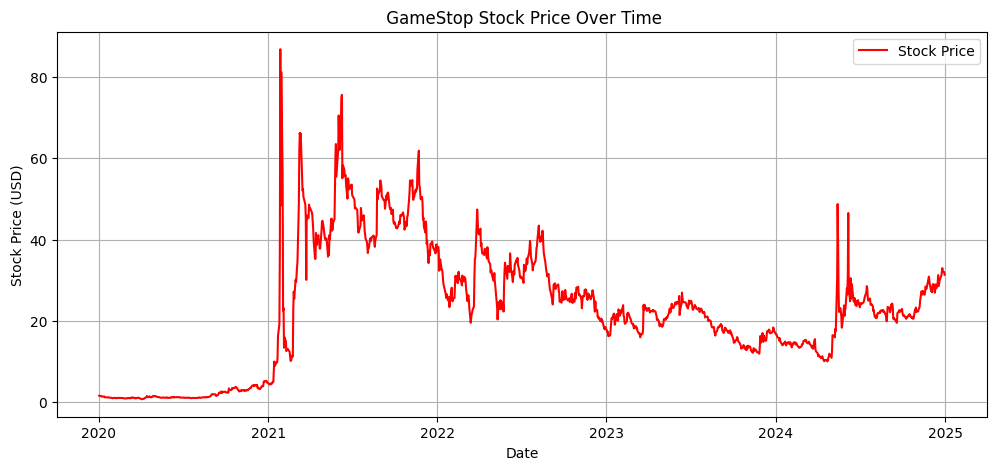

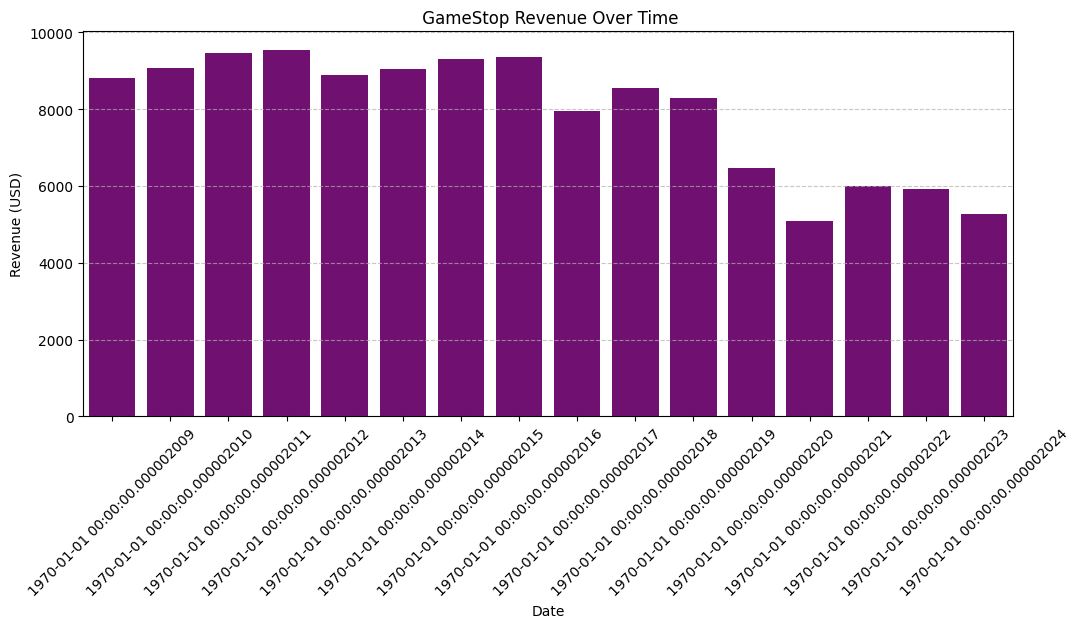

In [86]:
# Define stock symbol
symbol = "GME"

# Download stock data from Yahoo Finance
stock_data = yf.download(symbol, start="2020-01-01", end="2025-01-01")

# Display first 5 rows of stock data
stock_data.head()
# Load GameStop revenue data from CSV file
revenue_data = pd.read_csv("gamestop_revenue.csv")

# Convert 'Date' column to datetime and sort
revenue_data['Date'] = pd.to_datetime(revenue_data['Date'], errors='coerce')
revenue_data = revenue_data.dropna(subset=['Date'])  # Drop invalid dates
revenue_data = revenue_data.sort_values('Date')

# Clean 'Revenue' Column
revenue_data['Revenue'] = revenue_data['Revenue'].astype(str)  # Convert to string
revenue_data['Revenue'] = revenue_data['Revenue'].str.replace(r'[\$,]', '', regex=True)
revenue_data['Revenue'] = revenue_data['Revenue'].replace(['', 'NaN', 'None', '-'], '0')  # Handle invalid values
revenue_data['Revenue'] = pd.to_numeric(revenue_data['Revenue'], errors='coerce')  # Convert to float
revenue_data = revenue_data.dropna(subset=['Revenue'])  # Drop NaN values

# Display first 5 rows of cleaned revenue data
revenue_data.head()
plt.figure(figsize=(12, 5))
sns.lineplot(x=stock_data.index, y=stock_data['Close'], label="Stock Price", color='red')
plt.title(" GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 5))
sns.barplot(x=revenue_data['Date'], y=revenue_data['Revenue'], color='purple')
plt.title(" GameStop Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
